# Stage - Modélisation mathématique et environnement - Tutoriel
### destiné aux enseignant·es du secondaire
**Julien Guillod**, [Sorbonne Université](http://www.sorbonne-universite.fr/),
Licence <a href="https://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND</a>

Ce tutoriel est destiné à présenter quelques problèmes mathématiques simplifiés et comment des solutions approchées peuvent être construites numériquement. Le plan est le suivant:

1. La première partie est consacrée au schéma d'Euler explicite permettant de résoudre numériquement une équation différentielle ordinaire.

2. La seconde partie étudie un modèle climatique très simplifié mais présentant des caractéristiques génériques de modèles non-linéaires.

3. La troisième partie est une introduction à l'analyse numérique des équations aux dérivées partielles, avec l'étude de l'équation de transport à coefficients constants.

Les questions sont divisées en deux catégories:
- <span class="alert-info" style="color:black">bleues</span> : questions théoriques ou d'observation et d'interprétation de solutions numériques;
- <span class="alert-warning" style="color:black">oranges</span> : questions d'implémentation, dont les solutions sont données.

Avant de commencer, les commandes suivantes permettent de charger les modules [NumPy](https://numpy.org/) (pour définir des vecteurs et matrices) et le module [Matplotlib](https://matplotlib.org/) (pour faire des graphiques) qui seront constamment utilisés:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
plt.rcParams['figure.figsize'] = (10,6)

# 1. Schéma d'Euler explicite

Le but est de résoudre numériquement une équation différentielle du premier ordre:
$$
\begin{align*}
x^{\prime}(t) &= f(t,x(t)) \,, & x(0) &= x_0 \,,
\end{align*}
$$
où $f:\mathbb{R}^+ \times \mathbb{R} \to \mathbb{R}$ est une fonction assez régulière et $x_0\in\mathbb{R}$ une donnée initiale.
L'idée la plus simple pour résoudre de manière approchée une équation différentielle ordinaire est de discrétiser le temps avec un pas $\Delta t$ et d'approximer la dérivée temporelle sur chaque intervalle de longueur $\Delta t$.
Les inconnues deviennent alors les approximations de la solution $x(t)$ aux temps $t_i = i\Delta t$ pour $i\geq0$, c'est-à-dire $x_i = x(t_i)$.

Il y a trois façons simples d'approximer la dérivée en temps. La première est l'approximation par différence finie avant:
$$
x^{\prime}(t) \approx \frac{x(t+\Delta t)-x(t)}{\Delta t} = \frac{x_{i+1}-x_{i}}{\Delta t} \,,
$$
la seconde par différence finie arrière:
$$
x^{\prime}(t) \approx \frac{x(t)-x(t-\Delta t)}{\Delta t} = \frac{x_{i}-x_{i-1}}{\Delta t} \,,
$$
et la troisième par différence finie centrée:
$$
x^{\prime}(t) \approx \frac{x(t+\Delta t)-x(t-\Delta t)}{2\Delta t} = \frac{x_{i+1}-x_{i-1}}{2\Delta t} \,,
$$
comme représentées sur la figure suivante:

<img src="https://guillod.org/mediation/stage-cnrs/fig/euler.svg" width=600>

L'équation différentielle peut ainsi être approchée à l'aide des différences finies avant par:

$$
\frac{x_{i+1}-x_i}{\Delta t} = f(t_i, x_i)
$$

ce qui donne la formule d'Euler explicite:

$$
x_{i+1} = x_i + \Delta t \, f(t_i, x_i) \,.
$$

Avec l'approximation par différences finies arrière, on obtient la méthode d'Euler implicite:

$$
x_{i} = x_{i-1} + \Delta t \, f(t_i, x_i) \,.
$$

Avec les différences finies centrées, une méthode d'ordre deux de type saute-mouton (leapfrog):

$$
x_{i+1} = x_{i-1} + 2\Delta t \, f(t_i, x_i) \,.
$$

La formule d'Euler explicite permet de calculer directement tous les $x_i$ par récurrence en connaissant $x_0$. Par contre la formule d'Euler implicite nécessite à chaque pas de temps, la résolution d'une équation *a priori* non-linéaire pour $x_i$ par exemple avec la méthode de Newton. Les différences finies centrées forment une récurrence d'ordre deux.

<div class="alert alert-dismissable alert-info" style="color:black"><h4><strong>Question 1.1</strong></h4>

- D'où provient l'écart entre $x_i$ et $x(t_i)$?
- Quel est selon vous la meilleure approximation de $x'(t_i)$ parmi les trois proposées? On pourra reprendre le dessin et diviser $\Delta t$ par deux puis par quatre.
</div>

La différence entre $x_i$ et $x(t_i)$ provient de l'approximation de la dérivée par une différence finie, qui est exacte dans la limite où $\Delta t\to0$ mais pas pour un $\Delta t>0$.

La meilleure approximation de $x'(t)$ semble être celle avec les différences finies centrées.

<div class="alert alert-dismissable alert-warning" style="color:black"><h4><strong>Question 1.2</strong></h4>

Écrire une fonction `euler_explicit(f,t,x0,*args)` qui retourne les valeurs $x_0, x_1, \dots, x_m$ calculées avec la méthode d'Euler explicite aux temps $(t_i)_ {i=0}^m$ représentés par le vecteur `t`. La variable `x0` représente la donnée initiale et les variables `args` les éventuels paramètres présents dans la fonction `f(t,x,*args)`.
</div>

Une boucle sur le temps permet de remplir itérativement le vecteur `x`:

In [2]:
def euler_explicit(f, t, x0, *args):
    # initialise le vecteur de la solution
    x = np.zeros(len(t))
    # donnée initiale
    x[0] = x0
    # boucle en temps
    for i in range(len(t)-1):
        x[i+1] = x[i] + (t[i+1]-t[i])*f(t[i],x[i], *args)
    return x

<div class="alert alert-dismissable alert-warning" style="color:black"><h4><strong>Question 1.3</strong></h4>

Utiliser la méthode d'Euler explicite pour résoudre l'équation différentielle:
    
$$
x^{\prime}(t) = a x(t) + b \,, \quad x(0)=x_0 \,,
$$

pour $t\in[0,10]$ où $a,b\in\mathbb{R}$ sont deux paramètres réels. A noter que la solution exacte est connue:
$$
x(t) = \left(x_0+\frac{b}{a}\right) e^{at} - \frac{b}{a} \,,
$$
Écrire une fonction permettant de comparer graphiquement la solution exacte et les solutions approchées avec différents pas de temps $\Delta t$.
</div>

La fonction suivante retourne la solution approchée par la méthode d'Euler explicite avec un pas de temps `dt`:

In [3]:
def linsol(a,b,x0,dt):
    def f(t,x,a,b):
        return a*x+b
    t = np.linspace(0,10,int(10/dt))
    x = euler_explicit(f,t,x0,a,b)
    return t,x

La définition de la solution exacte:

In [4]:
def linsol_exacte(a,b,x0):
    t = np.linspace(0,10,100)
    if a != 0:
        x = (x0+b/a)*np.exp(a*t) - b/a
    else:
        x = x0 + b*t
    return t,x

permet de comparer graphiquement la solution numérique avec la solution exacte pour différentes discrétisations du temps et valeurs de $a$, $b$ et $x_0$:

In [5]:
def plot_linsol(a,b,x0,dt):
    plt.title(f"Comparaison avec la solution exacte pour $a={a:.2f}$, $b={b:.2f}$ et $x_0={x0:.2f}$")
    # affiche la solution exacte seulement si pas déjà affichée
    if "exacte" not in plt.gca().get_legend_handles_labels()[1]:
        plt.plot(*linsol_exacte(a,b,x0), label=f"exacte")
    plt.plot(*linsol(a,b,x0,dt), label=rf"$\Delta t = {dt}$")
    plt.legend()

<div class="alert alert-dismissable alert-info" style="color:black"><h4><strong>Question 1.4</strong></h4>

Observer ce qui se passe en changeant les valeurs de $a$, $b$ et $x_0$. En particulier on pourra se poser les questions suivantes en prenant $b=0$ pour simplifier:
- À votre avis, peut-on affirmer que la méthode d'Euler explicite converge vers la bonne solution?
- À partir des résultats numériques du cas $a<0$, dégager trois comportements différents de l'approximation numérique.
- Trouver une expression de $x_i$ en fonction de $x_0$.
- Pour $a<0$, à quelles conditions liant $a$ et $\Delta t$ est-on assuré que $\lim_{i \to +\infty} x_i = 0$? Que tous les $x_i$ ont le même signe que $x_0$?
- Pourquoi ces deux propriétés sont désirables?
</div>

En prenant des pas de temps de plus en plus petits, la solution numérique semble se rapprocher de la solution exacte:

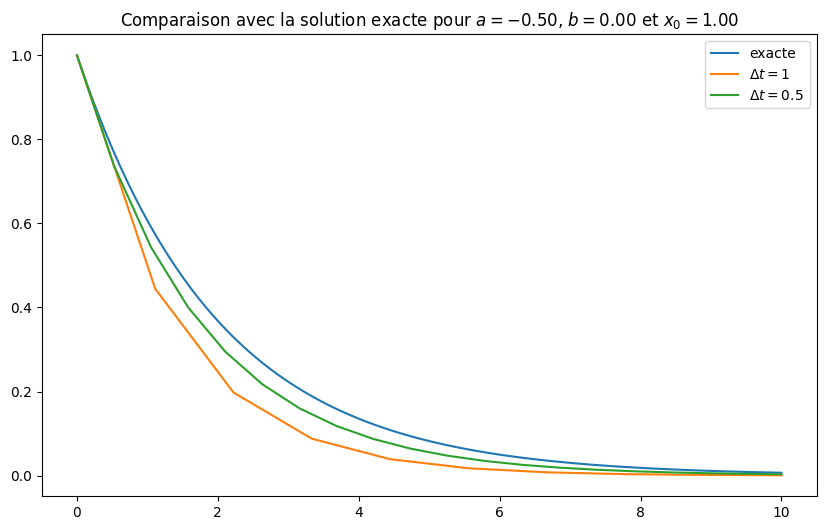

In [6]:
plot_linsol(-0.5,0,1,1)
plot_linsol(-0.5,0,1,0.5)

En prenant $a<0$ de plus en plus négatif avec par exemple $\Delta t=1$ et $x_0=1$, il apparait que la solution numérique commence à osciller, puis ensuite diverge lorsque $a$ est trop négatif:

In [7]:
interactive(plot_linsol, a=(-3.,3.), b=(-3., 3.), x0=(-2.,2.), dt=(0,2.))

interactive(children=(FloatSlider(value=0.0, description='a', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

Une explication simple à cela, peut être faite en écrivant à la main le schéma d'Euler explicite. Par simplicité, on considère le cas $a<0$ et $b=0$, ce qui donne:
$$x_{i+1} = x_i + \Delta t f(t_i,x_i) = (1+a\Delta t)x_i = (1+a\Delta t)^2 x_{i-1} = \cdots = (1+a\Delta t)^{i+1} x_0 $$

Par conséquent, si $|1+a\Delta t|<1$ *i.e.* $a>\frac{-2}{\Delta t}$, alors la solution numérique converge vers zéro et $\lim_{i\to\infty}x_i=0$. Dans le cas contraire, la solution numérique diverge.

Pour garder une solution positive, il faut que $1+a\Delta t>0$, *i.e.* $a>\frac{-1}{\Delta t}$. Sinon la solution oscille et prends des valeurs négatives.

La convergence de la solution vers zéro en temps long et sa positivité étant deux propriétés de l'équation, il est naturel de concevoir un schéma numérique qui les conserve. Ces propriétés sont liées à ce qui est appelé la stabilité d'un schéma numérique.

Le fait que le schéma numérique approxime bien localement la solution exacte est appelée la consistance du schéma. Généralement, la consistance plus la stabilité d'un schéma numérique permettent de déduire la convergence du schéma numérique, c'est-à-dire que la solution numérique converge vers la solution exacte lorsque $\Delta t\to0$.

# 2. Modèle climatique et stabilité

La plupart du matériel de cette section provient de l'article *Climate Change in a Differential Equations Course: Using Bifurcation Diagrams to Explore Small Changes with Big Effects*, [doi:10.5642/codee.201912.01.01](https://dx.doi.org/10.5642/codee.201912.01.01).

Dans un modèle très simpliste, la température $T$ (en degrés Celsius) de la Terre est modélisée en fonction du temps $t$ (en années) par l'équation différentielle suivante:
$$\frac{dT}{dt} = \frac{1}{10} (T-20)(T-22)(26-T) - k \,.$$
où $k\in\mathbb{R}$ représente la régulation gouvernementale sur les gaz à effet de serre.
La régulation de base correspond à $k=0$, une augmentation de la régulation à $k>0$ et une dérégulation à $k<0$.

Le but va être de résoudre numériquement cette équation pour prédire l'effet de la régulation $k$ sur la température de la Terre et comprendre mathématiquement ce qui se passe.

<div class="alert alert-dismissable alert-info" style="color:black"><h4><strong>Question 2.1</strong></h4>

En l'absence de régulation ou de dérégulation, c'est-à-dire pour $k=0$:
- Déterminer les solutions stationnaires, c'est-à-dire les solutions qui sont constantes dans le temps.
- Faire une conjecture sur la stabilité de la température $T=22°\mathrm{C}$ ?

</div>

Les solutions stationnaires sont caractérisées par $\frac{dT}{dt}=0$ donc sont les solutions de $(T-20)(T-22)(26-T)=0$ qui sont $20$, $22$, et $26$.

Pour faire une conjecture sur la stabilité de la température $22$, l'idée est de partir avec une température $T_0=22+\epsilon$ avec $\epsilon$ petit. Donc ce cas, le facteur $(T-20)$ est positif, le facteur $(T-22)$ à le signe de $\varepsilon$ et $(26-T)$ est positif. Donc lorsque $\varepsilon>0$, cela fait $\frac{dT}{dt}>0$ et la température augmente encore plus. Si $\varepsilon<0$, alors $\frac{dT}{dt}<0$ et donc la température diminue encore plus. Cela nous amène à conjecturer que la température $T=22°\mathrm{C}$ n'est pas stable.

<div class="alert alert-dismissable alert-warning" style="color:black"><h4><strong>Question 2.2</strong></h4>

Définir la fonction `f(t,x,k)` donnée par la partie droite de l'équation et écrire une fonction `plot_sol(k,T0)` permettant de représenter l'évolution de température en fonction du temps (par exemple de 0 à 30 ans) à partir de la température initiale `T0` et avec une régulation `k`.
</div>

La première étape est de définir la fonction correspondant à la partie droite de l'équation:

In [8]:
def f(t,x,k):
    return 1/10*(x-20)*(x-22)*(26-x) - k

Ensuite, il suffit d'utiliser la méthode d'Euler explicite définie précédemment pour la résoudre, par exemple sur l'intervalle $[0,30]$ années en partant d'une température initiale `T0`:

In [9]:
# Résolution avec la méthode d'Euler explicite
def sol(k,T0):
    t = np.linspace(0,30,300)
    return (t,euler_explicit(f,t,T0,k))
def plot_sol(k,T0):
    plt.title("Évolution de la température")
    plt.xlabel("$t$")
    plt.ylabel("$T$")
    plt.ylim(18,30)
    plt.plot(*sol(k,T0), label=f"$T_0={T0}$ et $k={k}$")
    plt.legend()

<div class="alert alert-dismissable alert-info" style="color:black"><h4><strong>Question 2.3</strong></h4>

Tester les effets de la température initiale $T_0$ et de la régularisation $k$ sur la température finale.
On pourra en particulier se poser les questions suivantes:
- Quelle est la température finale en partant de $T_0=20°\mathrm{C}$ ou $T_0=26°\mathrm{C}$ pour différentes valeurs de $k$?
- Quelle est la stabilité numérique des températures d'équilibres possibles à $k=0$ ?
</div>

Par exemple en partant d'une température initiale de $20°\mathrm{C}$:

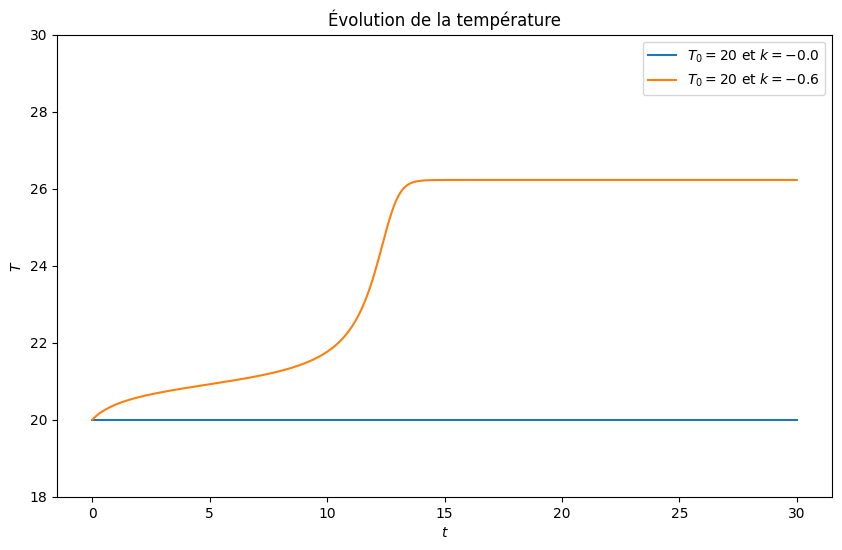

In [10]:
plot_sol(-0.0,20)
plot_sol(-0.6,20)

Avec une animation, il est possible d'observer les températures finales:

In [11]:
interactive(plot_sol, k=(-2.,2.), T0=(18.,30))

interactive(children=(FloatSlider(value=0.0, description='k', max=2.0, min=-2.0), FloatSlider(value=24.0, desc…

Cela nous permet de conclure empiriquement que les températures $20$ et $26$ sont stables et que les solutions vont à temps long vers l'une des deux suivant la valeur de $k$ et la température initiale. La température $22$ n'est pas stable.

<div class="alert alert-dismissable alert-warning" style="color:black"><h4><strong>Question 2.4</strong></h4>

Les températures d'équilibre possibles à une régulation $k$ donnée sont les solutions stationnaires, c'est-à-dire les solutions de
$$
\frac{1}{10} (T-20)(T-22)(26-T) - k = 0 \,.
$$
Écrire une fonction `plot_diag(T0)` qui représente sur le même graphique les températures d'équilibre possibles en fonction de $k$ ainsi que la température $T(30)$ à trente ans en fonction de $k$ pour la température initiale $T_0$ donnée.
</div>

La fonction suivante représente les solutions de cette équation en rouge ainsi que la température $T(30)$ à trente ans en fonction de $k$ en bleu:

In [12]:
def plot_diag(T0):
    
    # fonction qui a k,T0 renvoie la température à 30 ans
    @np.vectorize
    def diag(k, T0):
        t,x = sol(k, T0)
        return x[-1]
    
    plt.title(f"Température d'équilibre en fonction de $k$ avec $T_0={T0}$")
    plt.xlabel("$k$")
    plt.ylabel("$T$")

    # Graphique des températures d'équilibres possibles
    x = np.linspace(18.8, 26.8, 100)
    k = f(0,x,0)
    plt.plot(k,x, 'red', label="équilibre")

    # Graphique de la température à 30 ans en fonction de k
    k = np.linspace(-2,2,100)
    plt.plot(k,diag(k,T0), label="T(30)")

<div class="alert alert-dismissable alert-info" style="color:black"><h4><strong>Question 2.5</strong></h4>

Observer et interpréter les effets de la température initiale et de la régulation sur la température $T(30)$ à trente ans.
</div>

Température à trente ans en fonction de $k$ avec une température initiale $T_0=20°\mathrm{C}$:

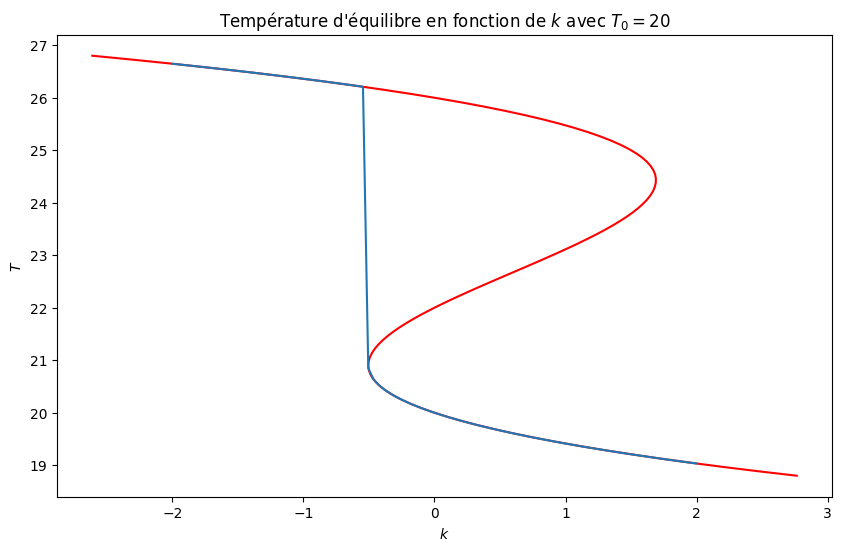

In [13]:
plot_diag(20)

Avec ce graphique l'interprétation est plus simple: lorsque $k$ diminue la température d'équilibre suit le bas de la courbe rouge, mais lorsque la courbe rouge change de sens ($k\approx-0.5$), la température d'équilibre saute vers le haut de la courbe rouge. La conclusion est que la température d'équilibre présente une discontinuité lorsque $k$ diminue avec une température initiale de $20°\mathrm{C}$.
Une question naturelle est de savoir ce qui se passe si après avoir été un pendant une période avec une dérégulation de $k=-0.6$ et donc une température d'équilibre d'environ $26°\mathrm{C}$ il est décidé de revenir à la régulation initiale $k=0$. Cela peut être simulé en commençant avec une température initiale $T(0)=26°\mathrm{C}$ et en variant $k$:

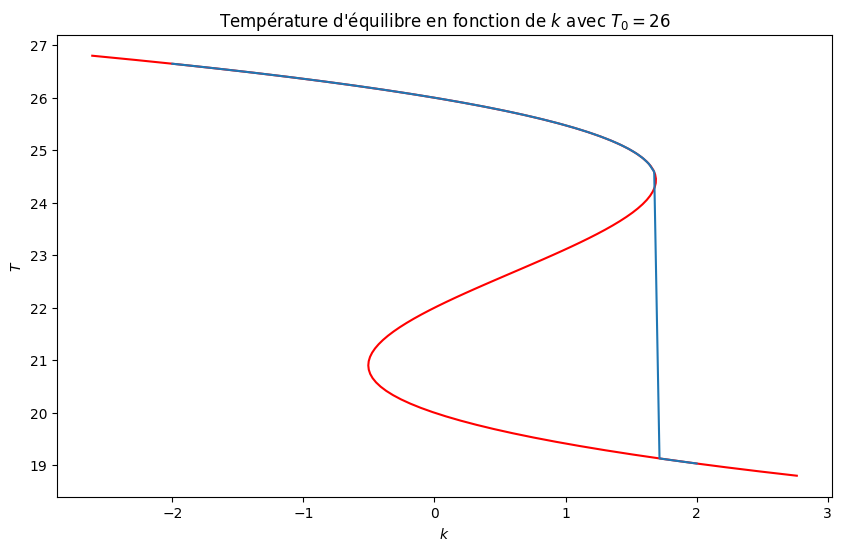

In [14]:
plot_diag(26)

La conclusion est que dans ce cas de figure il faut alors une régulation forte ($k>1.7$) pour que la température d'équilibre puisse revenir en dessous de $22°\mathrm{C}$ par exemple. Ce phénomène est appelé hystérèse: le système se "rappelle" de son état. Cela peut aussi être expliqué par le fait que la branche du milieu entre les deux points à tangente verticale est instable.

In [15]:
interactive(plot_diag, T0=(18,30))

interactive(children=(IntSlider(value=24, description='T0', max=30, min=18), Output()), _dom_classes=('widget-…

Ce genre de phénomènes d'hystérèse peut être facilement observé expérimentalement avec des films de savon, voir [ici](https://guillod.org/mediation/bulles-de-savon/morceaux-plans/)

# 3. Équation de transport

Le but est de cette partie est de résoudre numériquement l'équation de transport à coefficient constant avec conditions périodiques sur $[0,1]$:
$$\partial_t u(t,x) + a \partial_x u(t,x) = 0 \,, \quad u(0,x)=u_0(x) \,, \quad u(t,x+1) = u(t,x) \,,$$
pour $u:\mathbb{R}^+\times[0,1]\to\mathbb{R}$ où $u_0:[0,1]\to\mathbb{R}$ est la donnée initiale et $a\in\mathbb{R}$ la vitesse de propagation.

La solution exacte de cette équation est donnée par:
$$ u(t,x) = u_0(x-at) \,, $$
c'est-à-dire le transport de la donnée initiale $u_0$ vers la droite à vitesse $a$.

Pour résoudre numériquement cette équation, la première idée est de la discrétiser en espace en cherchant les valeurs de $u$ aux points $x_n=\frac{n}{N}$ pour $n=0,1,\dots,N-1$. A ce stade, les inconnues sont donc les fonctions $u_n(t)=u(t,x_n)$. La méthode des différences finies consiste à approximer la dérivée en espace sur le pas d'espace $\Delta x=\frac{1}{N}$. Il y a trois façons de le faire simplement:
$$
\begin{align*}
\partial_x u(t,x) &\approx \frac{u(t,x+\Delta x) - u(t,x)}{\Delta x} = \frac{u_{n+1}(t) - u_{n}(t)}{\Delta x} \,, \tag{downwind}\\
\partial_x u(t,x) &\approx \frac{u(t,x) - u(t,x-\Delta x)}{\Delta x} = \frac{u_{n}(t) - u_{n-1}(t)}{\Delta x} \,, \tag{upwind}\\
\partial_x u(t,x) &\approx \frac{u(t,x+\Delta x) - u(t,x-\Delta x)}{2\Delta x} =\frac{u_{n+1}(t) - u_{n-1}(t)}{2\Delta x} \,, \tag{centred}\\
\end{align*}
$$
comme représentées sur la figure suivante (la dépendance temporelle a été supprimée):

<img src="https://guillod.org/mediation/stage-cnrs/fig/finite-differences.svg" width=600>

Pour respecter la condition de périodicité $u(t,x+1) = u(t,x)$, il faut ajouter la condition $u_{n+N}(t) = u_{n}(t)$

Chaque discrétisation en espace amène à résoudre $N$ équations différentielles couplées:
$$
\begin{align*}
u_n^\prime(t) &= -a\frac{u_{n+1}(t) - u_{n}(t)}{\Delta x} \,, \tag{downwind}\\
u_n^\prime(t) &= -a\frac{u_{n}(t) - u_{n-1}(t)}{\Delta x} \,, \tag{upwind}\\
u_n^\prime(t) &= -a\frac{u_{n+1}(t) - u_{n-1}(t)}{2\Delta x} \,. \tag{centred}\\
\end{align*}
$$

Ces équations peuvent être mise individuellement sous la forme d'une équation différentielle dans $\mathbb{R}^N$
$$
U^\prime(t) = f(U(t)) \,,
$$
sur le vecteur $U=(u_0,u_1,u_2,\dots,u_{N-1})$.
Cette équation différentielle peut alors par exemple être résolue par la méthode d'Euler explicite:
$$ U_{i+1} = U_i + \Delta t \, f(U_i) \,,$$
ce qui amène aux schémas numériques suivants:
$$
\begin{align*}
u_{n,i+1} &= u_{n,i} - \nu \left(u_{n+1,i} - u_{n,i}\right) \,, \tag{downwind}\\
u_{n,i+1} &= u_{n,i} - \nu \left(u_{n,i} - u_{n-1,i}\right) \,, \tag{upwind}\\
u_{n,i+1} &= u_{n,i} - \frac{\nu}{2} \left(u_{n+1,i} - u_{n-1,i}\right) \,, \tag{centred}\\
\end{align*}
$$
où $\nu=\frac{a\Delta t}{\Delta x}$.

Le plus simple pour coder ces méthodes est de définir une fonction $M:\mathbb{R}^N\to\mathbb{R}^N$ permettant de passer de $U_{i+1}$ à $U_i$:
$$
U_{i+1} = M(U_i) \,.
$$
Les fonctions $M$ pour les trois schémas sont données par:
$$
\begin{align*}
M\bigl(u_{0},u_{1},u_{2},\dots,u_{N-1}\bigr) & =\bigl(u_{0},u_{1},u_{2},\dots,u_{N-1}\bigr)-\nu\bigl(u_{1}-u_{0},u_{2}-u_{1},u_{3}-u_{2},\dots,u_{0}-u_{N-1}\bigr)\,,\tag{downwind}\\
M\bigl(u_{0},u_{1},u_{2},\dots,u_{N-1}\bigr) & =\bigl(u_{0},u_{1},u_{2},\dots,u_{N-1}\bigr)-\nu\bigl(u_{0}-u_{N-1},u_{1}-u_{0},u_{2}-u_{1},\dots,u_{N-1}-u_{N-2}\bigr)\,,\tag{upwind}\\
M\bigl(u_{0},u_{1},u_{2},\dots,u_{N-1}\bigr) & =\bigl(u_{0},u_{1},u_{2},\dots,u_{N-1}\bigr)-\frac{\nu}{2}\bigl(u_{1}-u_{N-1},u_{2}-u_{0},u_{3}-u_{1},\dots,u_{0}-u_{N-2}\bigr)\,,\tag{centred}
\end{align*} \,.
$$

<div class="alert alert-dismissable alert-warning" style="color:black"><h4><strong>Question 3.1</strong></h4>

Écrire les fonctions `downwind(u, CFL)`, `upwind(u, CFL)` et `centred(u, CFL)` correspondantes au trois fonctions $M$ définies ci-dessus.
</div>

In [16]:
# Définition du schéma downwind
def downwind(u, CFL):
    du = np.zeros_like(u)
    du[:-1] = (u[1:]-u[:-1])
    du[-1] = (u[0]-u[-1])
    u -= CFL*du
    return u

In [17]:
# Définition du schéma upwind
def upwind(u, CFL):
    du = np.zeros_like(u)
    du[1:] = (u[1:]-u[:-1])
    du[0] = (u[0]-u[-1])
    u -= CFL*du
    return u

In [18]:
# Définition du schéma centred
def centred(u, CFL):
    du = np.zeros_like(u)
    du[1:-1] = (u[2:]-u[:-2])/2
    du[0] = (u[1]-u[-1])/2
    du[-1] = (u[0]-u[-2])/2
    u -= CFL*du
    return u

<div class="alert alert-dismissable alert-warning" style="color:black"><h4><strong>Question 3.2</strong></h4>

Pour tester ces schémas, il faut choisir des données initiales. Ici on se propose de tester avec une donnée lisse:
$$u_0(x) = \sin(2\pi x) \,,$$
puis ensuite avec une donnée pas lisse:
$$u_0(x) = \begin{cases}
0 & 0 \leq x<\frac{1}{4} \,\text{ou}\, \frac{3}{4} \leq x < 1,\\
1 & \frac{1}{4} \leq x < \frac{3}{4} \,,
\end{cases}
$$
périodisée. Écrire les fonctions `u01(x)` et `u02(x)` correspondantes.
</div>

In [19]:
def u01(x):
    return np.sin(2*np.pi*x)

@np.vectorize
def u02(x):
    x = x % 1
    if 0 <= x <= 1/4 or 3/4 <= x <= 1:
        return 0.
    else:
        return 1.

<div class="alert alert-dismissable alert-warning" style="color:black"><h4><strong>Question 3.3</strong></h4>

Écrire une fonction ou classe permettant de simuler le problème en utilisant au choix une de trois méthodes et pour en faire la représentation graphique.
</div>

La classe suivante permet d'initialiser et de résoudre le problème pour n'importe quelle méthode donnée:

In [20]:
class simulate:
    
    def __init__(self):
        self.Lx = 1
        self.Nx = 100
        self.cfl = 0.3
        self.T = 0.3

    def update(self):
        self.x = np.linspace(0, self.Lx, self.Nx, endpoint=False) # space grid
        self.dx = self.x[1]-self.x[0] # spatial step
        self.dt = self.cfl*self.dx # time step
        self.t = np.arange(0,self.T,self.dt) # time grid

    def run(self):
        self.update()
        method = self.method
        # time stepping
        for time in self.t:
            if time == 0:
                u = self.u0(self.x)
            else:
                u = method(u, self.cfl)
        self.u = u
        return u

Cela permet de comparer les trois schémas pour une donnée initiale donnée:

In [21]:
def plot_transport(u0):
    plt.title("Comparaison des schémas upwind, centred, downwind")

    s = simulate()
    s.Nx = 400
    s.T = 0.4
    s.cfl = 0.5
    s.u0 = u0

    for m in [downwind,centred,upwind]:
        s.method = m
        s.run()
        plt.plot(s.x,s.u, label=m.__name__)

    plt.plot(s.x,s.u0(s.x-s.T), label="exacte")
    plt.legend()
    plt.ylim(-1.5,1.5)
    plt.show()

<div class="alert alert-dismissable alert-info" style="color:black"><h4><strong>Question 3.4</strong></h4>

Observer et interpréter les résultats obtenus pour les trois schémas et les deux données initiale différentes.
</div>

Pour la donnée initiale lisse, le schéma downwind fait n'importe quoi et le schéma centré est très oscillant: 

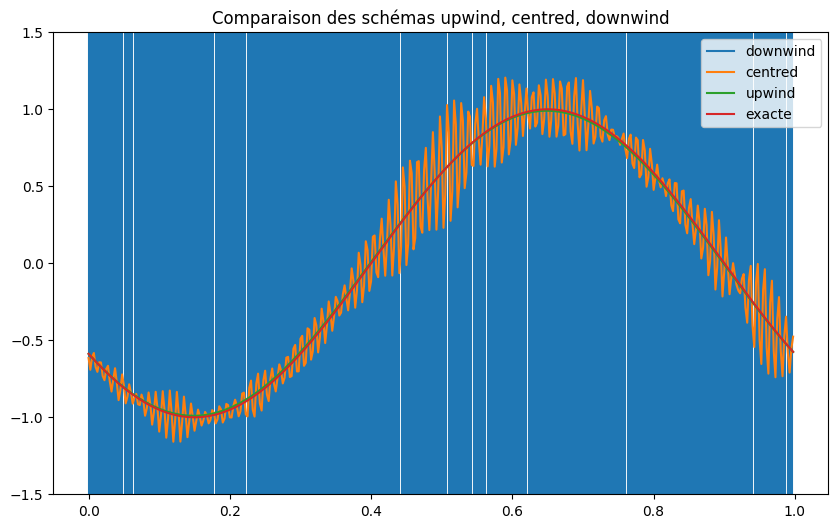

In [22]:
plot_transport(u01)

En essayant avec la donnée initiale discontinue, seul le schéma upwind retourne une solution raisonnable:

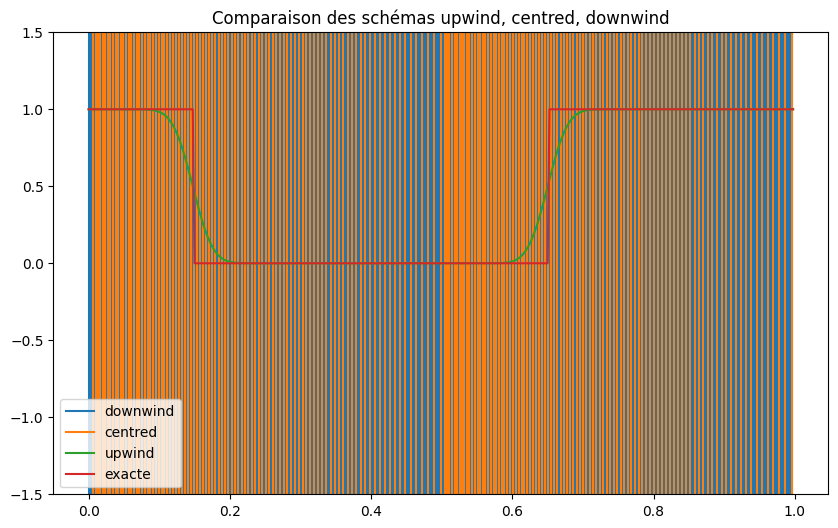

In [23]:
plot_transport(u02)

La conclusion est que le schéma downwind ne retourne pas la bonne solution, il est complétement instable. Le schéma centré est très bruité et également pas stable. Seul le schéma upwind semble retourne une bonne approximation. Ce phénomène provient du fait que dans une équation de transport, il faut aller chercher l'information au pas de temps précédant du côté par lequel l'information arrive. Ce principe est fondamental dans la discrétisation des équations aux dérivées partielles. Même si intuitivement le schéma centré donne une meilleure approximation de la dérivée en espace, le schéma numérique résultant est instable donc inutilisable.